[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(5572, 9395)
['' '0' '008704050406' ... 'ûïharry' 'ûò' 'ûówell']
Accuracy: 0.9506726457399103


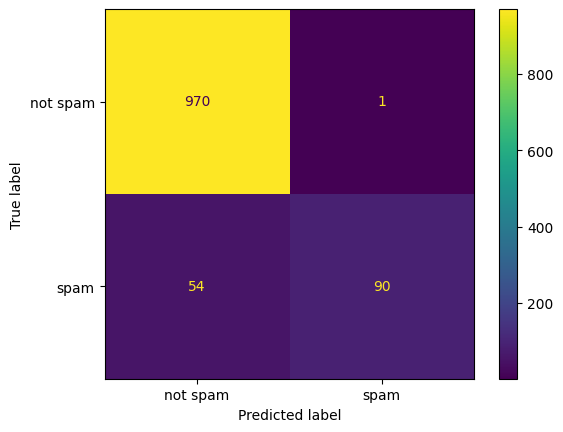

In [2]:
# importing libraries
import pandas as pd
import string
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# loading the data
messages = pd.read_csv("/content/spam.csv", encoding="latin-1", usecols=[0,1])
# giving names to column
messages.columns = ['label','text']
# assigning label numbers
# 0- ham(not spam)
# 1- spam
messages['label_num'] = messages['label'].map({'ham': 0, 'spam': 1})
# printing first 5 results
messages.head()

# downloading stopwords
nltk.download('stopwords')
# taking stopwords from nltk
stopwords=nltk.corpus.stopwords.words('english')
# cleaning data
def clean_text(text):
  text="".join(char.lower() for char in text if char not in string.punctuation)
  tokens = re.split(r'\W+', text)
  text=[word for word in tokens if word not in stopwords]
  return text

# TF-IDF Vectorizer
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(messages['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

# Converting sparse TF-IDF matrix to a regular array and storing as a DataFrame
X_features=pd.DataFrame(X_tfidf.toarray())
# printing first 5 rows
X_features.head()

# random train test split (80% training,20% testing)
X_train,X_test,y_train,y_test=train_test_split(X_features,messages['label_num'],test_size=0.2)


# training model
logistic_regression=LogisticRegression(max_iter=1000)
logistic_regression_model=logistic_regression.fit(X_train,y_train)

# prediction on test data
y_pred=logistic_regression_model.predict(X_test)

# accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["not spam", "spam"])
disp.plot()
plt.show()

